# Problem Statement 


In [1]:

# Instacart is challenging to use this anonymized data on customer orders over time to predict which previously purchased products will be in a user’s next order. #
# Problem selected:
# Understand the most frequest categories
# PRedict the next product to be purchased to be able to stock up the place for online Shopping.

# Data Description

In [2]:
 #File descriptions
#Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names should be self-explanatory.

#aisles.csv
 #aisle_id,aisle  
 #1,prepared soups salads  
# 2,specialty cheeses  
# 3,energy granola bars  

#departments.csv
# department_id,department  
# 1,frozen  
# 2,other  
# 3,bakery  
 
#order_products__*.csv
#These files specify which products were purchased in each order. order_products__prior.csv contains previous order contents for all customers. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items. You may predict an explicit 'None' value for orders with no reordered items. See the evaluation page for full details.

#order_id,product_id,add_to_cart_order,reordered  
# 1,49302,1,1  
# 1,11109,2,1  
# 1,10246,3,0  
  
#orders.csv
#This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 'order_dow' is the day of week.

 #order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order  
 #2539329,1,prior,1,2,08,  
 #2398795,1,prior,2,3,07,15.0  
 #473747,1,prior,3,3,12,21.0  
 
#products.csv
#product_id,product_name,aisle_id,department_id
#1,Chocolate Sandwich Cookies,61,19  
#2,All-Seasons Salt,104,13  
#3,Robust Golden Unsweetened Oolong Tea,94,7  

#sample_submission.csv
#order_id,products
#17,39276  
#34,39276  
#137,39276  

# Import libraries

In [3]:
import pylab
import calendar
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
sn.set_palette(palette="OrRd")
from pandas import Series, DataFrame, set_option
from pandas.plotting import scatter_matrix

import statsmodels.api as sm

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#cross validation
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from math import sqrt

# Compare Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
from pickle import dump
from pickle import load



#Clean these libraries
# Load libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, set_option
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Compare Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
from pickle import dump
from pickle import load

# Read CSVs

In [4]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orderProductsTrain = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
orderProductsPrior = pd.read_csv('order_products__prior.csv')

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
departments.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
orderProductsTrain.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
products.head()


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
orderProductsPrior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
orderProductsTrain.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


# When Do People Generally Order?


In [11]:
products.describe()

,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
orderProductsPrior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [15]:
orderProductsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Order Count Across Hour Of The Day')]

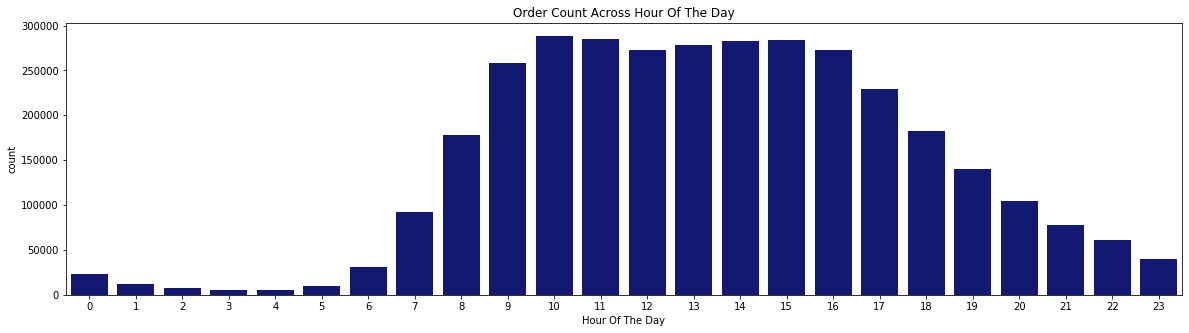

In [13]:
# using the variable ax for single a Axes
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(data=orders,x="order_hour_of_day",ax=ax,color="#030b82")
ax.set(xlabel='Hour Of The Day',title="Order Count Across Hour Of The Day")


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2bc80379708>)

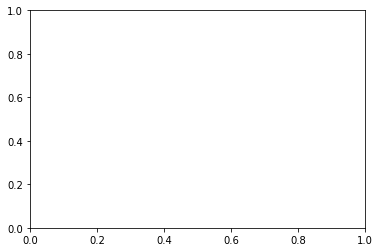

In [14]:

 plt.subplots()


# At What Day Of The Week People Order?

In [1]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

sn.countplot(color="#030b82",data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")

NameError: name 'plt' is not defined

# After how many days Do People Generally Reorder?

[Text(0.5, 0, 'Hour Of The Day'), Text(0.5, 1.0, 'Reorder Count')]

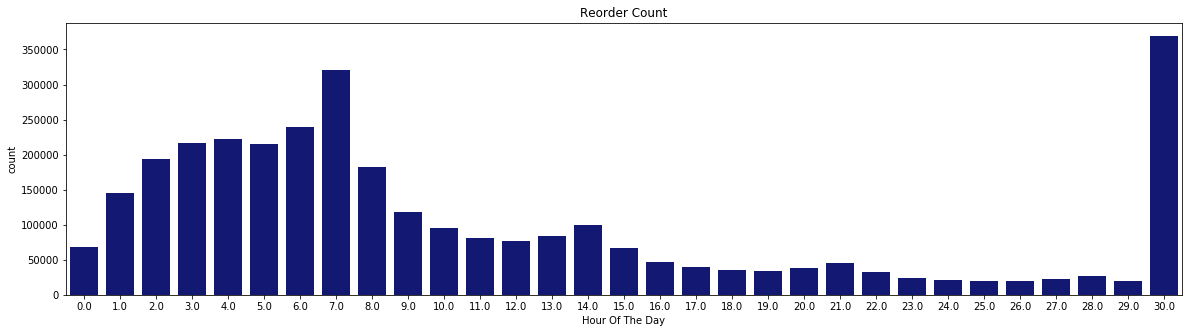

In [16]:
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(color="#030b82",data=orders,x="days_since_prior_order",ax=ax)
ax.set(xlabel='Hour Of The Day',title="Reorder Count")

# How many orders users generally made?

[Text(0.5, 0, 'Order Count'), Text(0.5, 1.0, 'Order Count')]

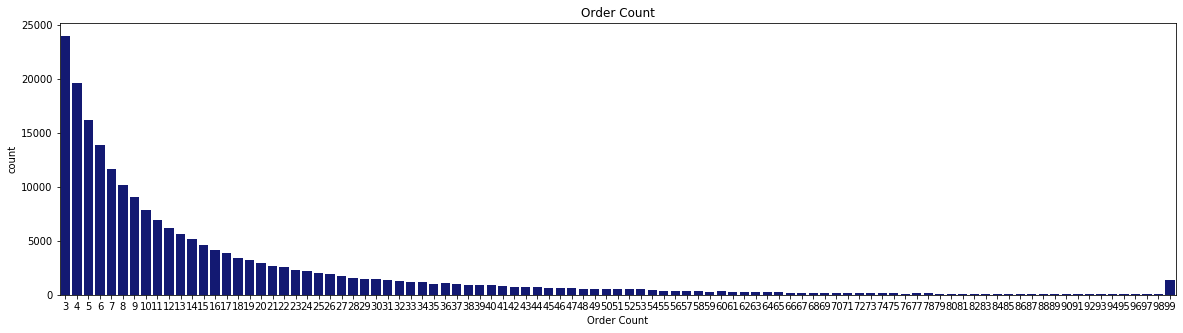

In [17]:
orderCount = orders[orders["eval_set"]=="prior"].groupby(by=["user_id"])["order_id"].count().to_frame()
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sn.countplot(color="#030b82",data=orderCount,x="order_id",ax=ax)
ax.set(xlabel='Order Count',title="Order Count")

# Best Selling Products

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


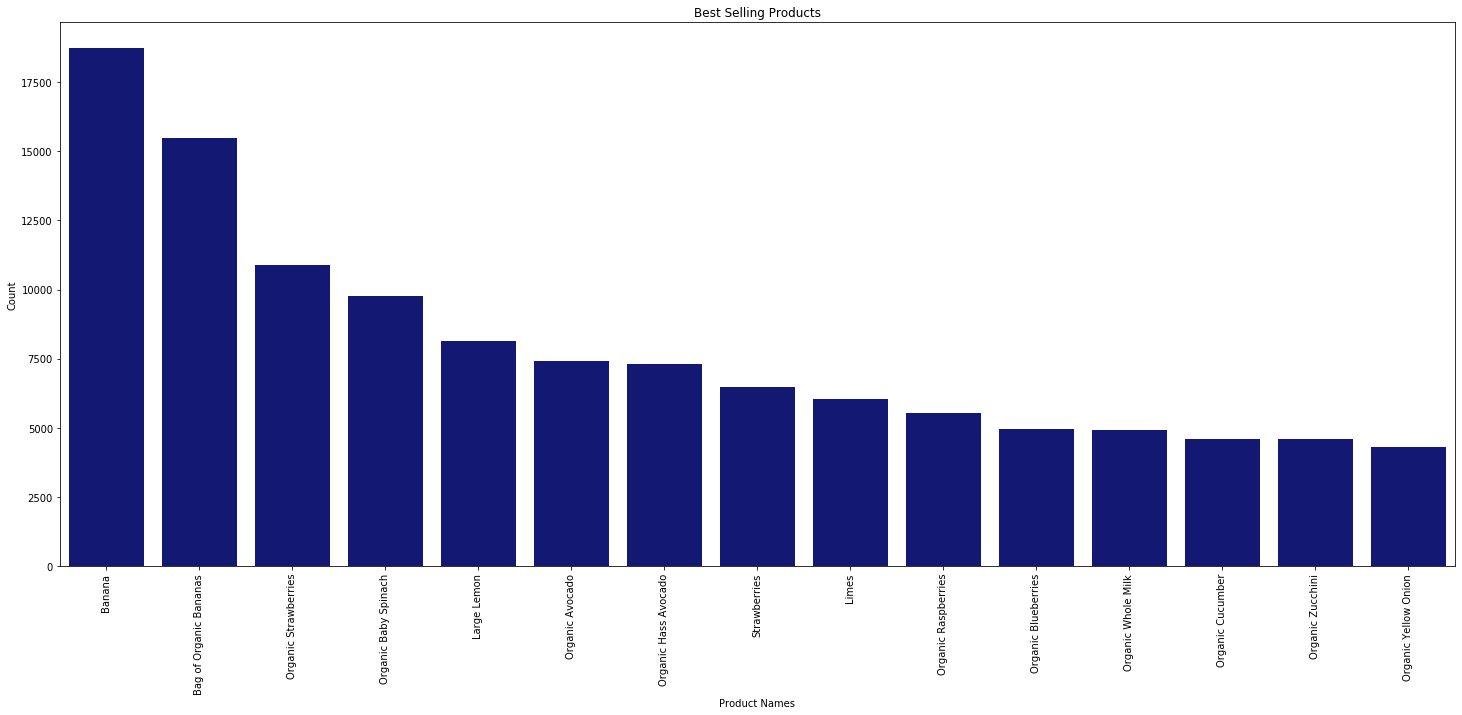

In [9]:
productsCount = orderProductsTrain["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=mergedData.head(15),x="product_name",y="count",ax=ax,orient="v",color="#030b82")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)

mergedData.head(10)

In [19]:
# Top Reordered products

,product_id,count,reordered_count,reordered_ratio,product_name,aisle_id,department_id
0,43334,1,1.0,1.0,Classics Hot Cocoa Mix Variety Pack,90,7
1,24324,1,1.0,1.0,Vitamin B-12 1000 mcg,47,11
2,3171,2,2.0,1.0,Beef Raviolis Pasta in Meat Sauce,59,15
3,20611,2,2.0,1.0,3 Ply Wheat Straw Bath Tissue,54,17
4,47221,2,2.0,1.0,Premium Roast Decaf K Cup,26,7
5,98,2,2.0,1.0,2% Yellow American Cheese,2,16
6,28558,2,2.0,1.0,Organic Irish Breakfast Black Tea,94,7
7,27354,2,2.0,1.0,Authentic Asia Shrimp Wonton Soup With Noodles,38,1
8,9361,2,2.0,1.0,Healthy Indulgence Salmon & Chicken Cat Food,41,8
9,26851,2,2.0,1.0,Chew-Lotta Long Lasting Chewbone Dog Snacks,40,8


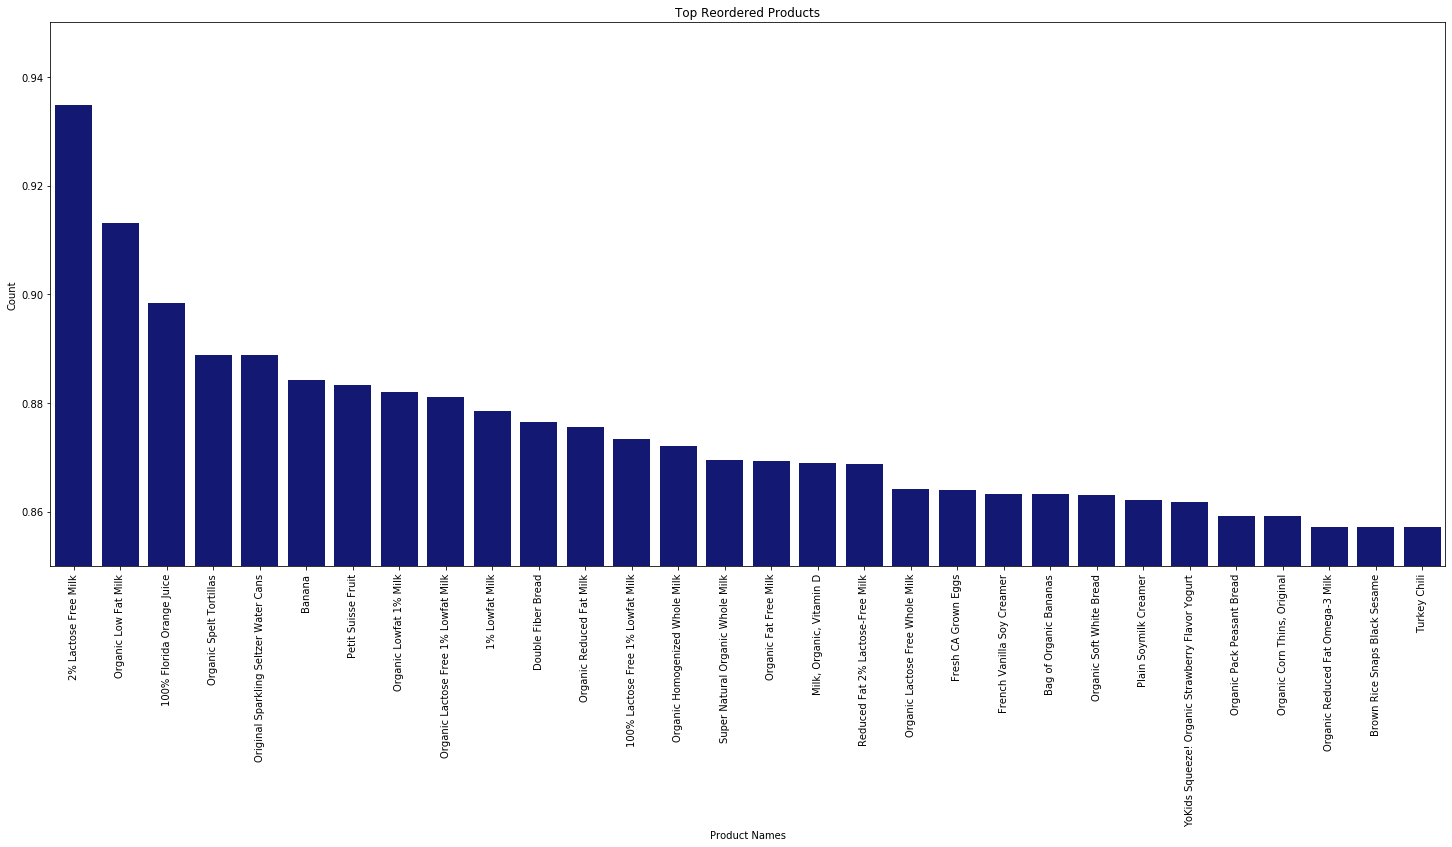

In [10]:
productsCountReordered = orderProductsTrain[orderProductsTrain["reordered"]==1]["product_id"].value_counts().to_frame()
productsCountReordered["reordered_count"] = productsCountReordered.product_id
productsCountReordered["product_id"] = productsCountReordered.index
productCountReorderedMerged = pd.merge(productsCount,productsCountReordered,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountReorderedMerged["reordered_ratio"] = productCountReorderedMerged["reordered_count"]/productCountReorderedMerged["count"]
productCountReorderedMerged.sort_values(by="reordered_ratio",ascending=False,inplace=True)
productMerged = pd.merge(productCountReorderedMerged,products,how="left",on="product_id")

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=productMerged[productMerged["count"]>40].head(30),x="product_name",y="reordered_ratio",color="#030b82",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.85,.95)
plt.xticks(rotation=90)

productMerged.head(10)

# Which item people purchase first

,product_id,count,reordered_count,first_ordered_ratio,product_name,aisle_id,department_id
0,39239,1,1.0,1.0,Singapore Street Classic Curry Noodles,66,6
1,4611,1,1.0,1.0,Fair Trade Blackberry Premium Spread,88,13
2,34443,1,1.0,1.0,Clary Sage Essential Oil,101,17
3,10665,1,1.0,1.0,3 cup Glass Tupperware with Lid,85,17
4,19740,1,1.0,1.0,Daily Moisture Quench Beauty Bar Soap,127,11
5,10515,1,1.0,1.0,100% Pure Organic Maple Syrup Grade B Dark & D...,29,13
6,14997,1,1.0,1.0,Long Hammer IPA Beer,27,5
7,6433,1,1.0,1.0,Raw Veggie Wrappers,13,20
8,1686,1,1.0,1.0,Thai Style Spring Rolls with Sweet & Sour Sauce,129,1
9,45697,1,1.0,1.0,Ultra Strong Hold Full Control Non-Aerosol Hai...,22,11


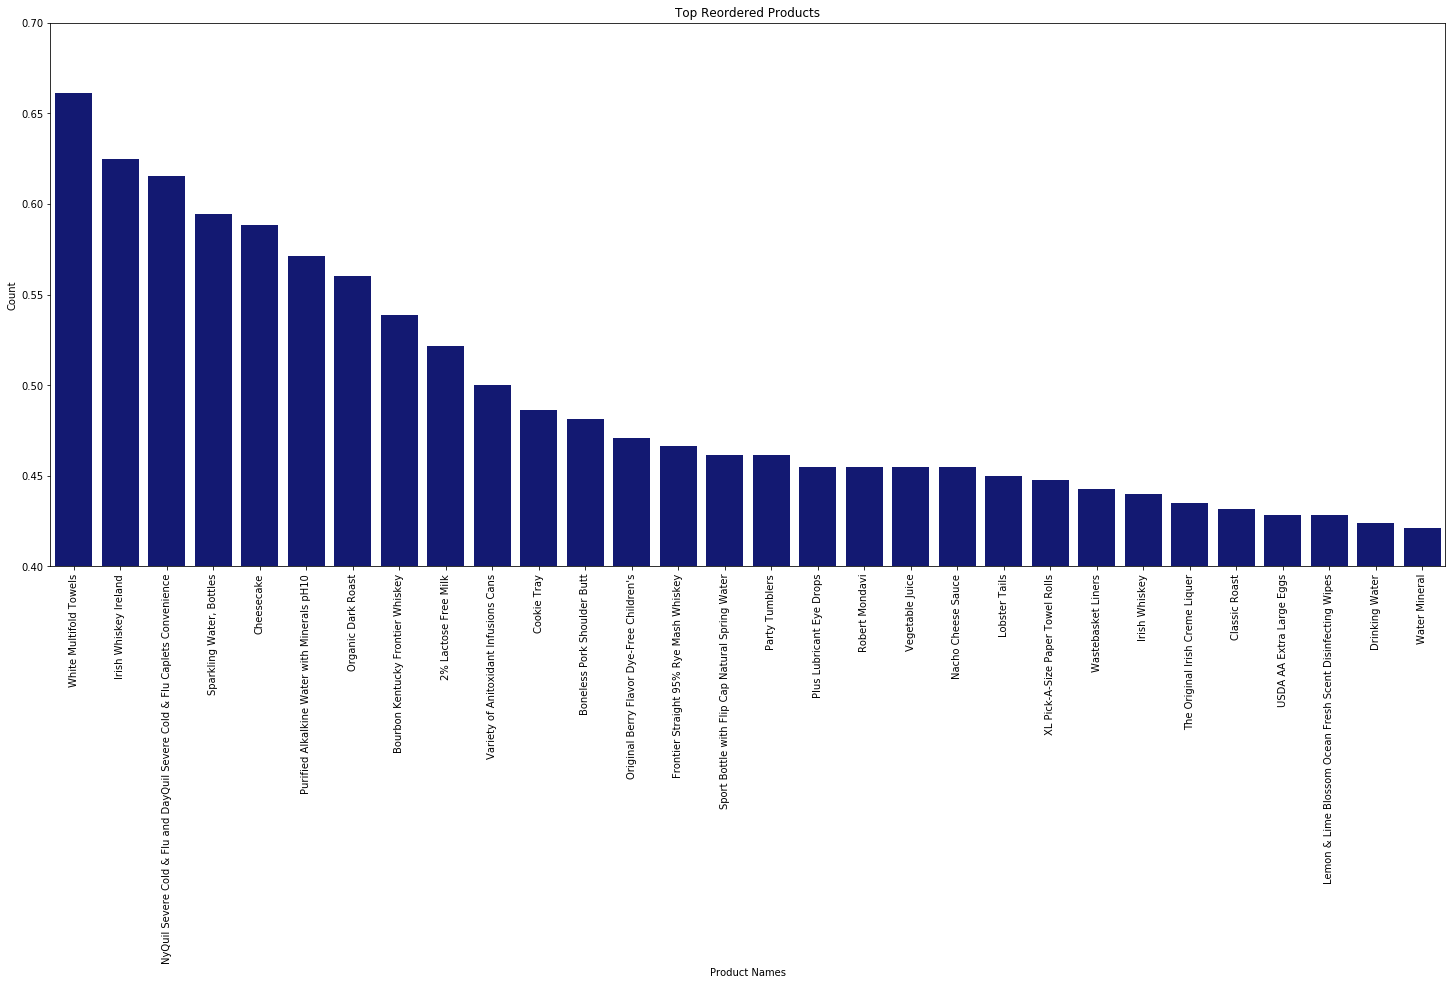

In [21]:
productsCountFirst = orderProductsTrain[orderProductsTrain["add_to_cart_order"]==1]["product_id"].value_counts().to_frame()
productsCountFirst["reordered_count"] = productsCountFirst.product_id
productsCountFirst["product_id"] = productsCountFirst.index
productCountFirstMerged = pd.merge(productsCount,productsCountFirst,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountFirstMerged["first_ordered_ratio"] = productCountFirstMerged["reordered_count"]/productCountFirstMerged["count"]
productCountFirstMerged.sort_values(by="first_ordered_ratio",ascending=False,inplace=True)
firstMerged = pd.merge(productCountFirstMerged,products,how="left",on="product_id")


fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sn.barplot(data=firstMerged[firstMerged["count"]>10].head(30),x="product_name",y="first_ordered_ratio",color="#030b82",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.4,.7)
plt.xticks(rotation=90)

firstMerged.head(10)

# Correlation Matrix

In [22]:
corrMat = products.corr()
print(corrMat)

               product_id  aisle_id  department_id
product_id       1.000000 -0.000807       0.002074
aisle_id        -0.000807  1.000000       0.094784
department_id    0.002074  0.094784       1.000000


In [23]:
corrMat2 = orders.corr()
print(corrMat)

               product_id  aisle_id  department_id
product_id       1.000000 -0.000807       0.002074
aisle_id        -0.000807  1.000000       0.094784
department_id    0.002074  0.094784       1.000000


In [24]:
covMat = products.cov()
print(covMat)

                 product_id     aisle_id  department_id
product_id     2.057456e+08  -443.265955     174.020317
aisle_id      -4.432660e+02  1468.128302      21.247323
department_id  1.740203e+02    21.247323      34.227291


In [25]:
covMat2 = orders.cov()
print(covMat)

                 product_id     aisle_id  department_id
product_id     2.057456e+08  -443.265955     174.020317
aisle_id      -4.432660e+02  1468.128302      21.247323
department_id  1.740203e+02    21.247323      34.227291


In [26]:
orders.head

<bound method NDFrame.head of          order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     NaN  
1                        7                    15.0  
2                       12                

In [27]:
products.head

<bound method NDFrame.head of        product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id  
0            61             19  
1           104             13  
2     

# Data Preparation - Understand Shopping Cart and merge data frames

In [28]:
#aisles = pd.read_csv('aisles.csv')
#departments = pd.read_csv('departments.csv')
#orderProductsTrain = pd.read_csv('order_products__train.csv')
#orders = pd.read_csv('orders.csv')
#products = pd.read_csv('products.csv')
#orderProductsPrior = pd.read_csv('order_products__prior.csv')
# Shopping Carts
shoppingcart = pd.merge(orderProductsPrior, products, on='product_id', how ='outer')


In [29]:
shoppingcart.head

<bound method NDFrame.head of           order_id  product_id  add_to_cart_order  reordered  \
0              2.0       33120                1.0        1.0   
1             26.0       33120                5.0        0.0   
2            120.0       33120               13.0        0.0   
3            327.0       33120                5.0        1.0   
4            390.0       33120               28.0        1.0   
...            ...         ...                ...        ...   
32434495       NaN       37703                NaN        NaN   
32434496       NaN       43725                NaN        NaN   
32434497       NaN       45971                NaN        NaN   
32434498       NaN       46625                NaN        NaN   
32434499       NaN       49540                NaN        NaN   

                                               product_name  aisle_id  \
0                                        Organic Egg Whites        86   
1                                        Organic Egg Wh

In [30]:
shoppingcart2 = shoppingcart

In [31]:
shoppingcart.describe

<bound method NDFrame.describe of           order_id  product_id  add_to_cart_order  reordered  \
0              2.0       33120                1.0        1.0   
1             26.0       33120                5.0        0.0   
2            120.0       33120               13.0        0.0   
3            327.0       33120                5.0        1.0   
4            390.0       33120               28.0        1.0   
...            ...         ...                ...        ...   
32434495       NaN       37703                NaN        NaN   
32434496       NaN       43725                NaN        NaN   
32434497       NaN       45971                NaN        NaN   
32434498       NaN       46625                NaN        NaN   
32434499       NaN       49540                NaN        NaN   

                                               product_name  aisle_id  \
0                                        Organic Egg Whites        86   
1                                        Organic Eg

In [32]:


shoppingcart = pd.merge(shoppingcart, orders, on='order_id', how ='inner')


In [33]:
shoppingcart = pd.merge(shoppingcart, orderProductsTrain, on='order_id', how ='inner')

In [34]:
shoppingcart.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [order_id, product_id_x, add_to_cart_order_x, reordered_x, product_name, aisle_id, department_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order, product_id_y, add_to_cart_order_y, reordered_y]
Index: []>

In [35]:
shoppingcart.head

<bound method NDFrame.head of Empty DataFrame
Columns: [order_id, product_id_x, add_to_cart_order_x, reordered_x, product_name, aisle_id, department_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order, product_id_y, add_to_cart_order_y, reordered_y]
Index: []>

In [36]:
corrMat = shoppingcart.corr()
print(corrMat)

                        order_id  product_id_x  add_to_cart_order_x  \
order_id                     NaN           NaN                  NaN   
product_id_x                 NaN           NaN                  NaN   
add_to_cart_order_x          NaN           NaN                  NaN   
reordered_x                  NaN           NaN                  NaN   
aisle_id                     NaN           NaN                  NaN   
department_id                NaN           NaN                  NaN   
user_id                      NaN           NaN                  NaN   
order_number                 NaN           NaN                  NaN   
order_dow                    NaN           NaN                  NaN   
order_hour_of_day            NaN           NaN                  NaN   
days_since_prior_order       NaN           NaN                  NaN   
product_id_y                 NaN           NaN                  NaN   
add_to_cart_order_y          NaN           NaN                  NaN   
reorde

In [37]:
shoppingcart.head

<bound method NDFrame.head of Empty DataFrame
Columns: [order_id, product_id_x, add_to_cart_order_x, reordered_x, product_name, aisle_id, department_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order, product_id_y, add_to_cart_order_y, reordered_y]
Index: []>

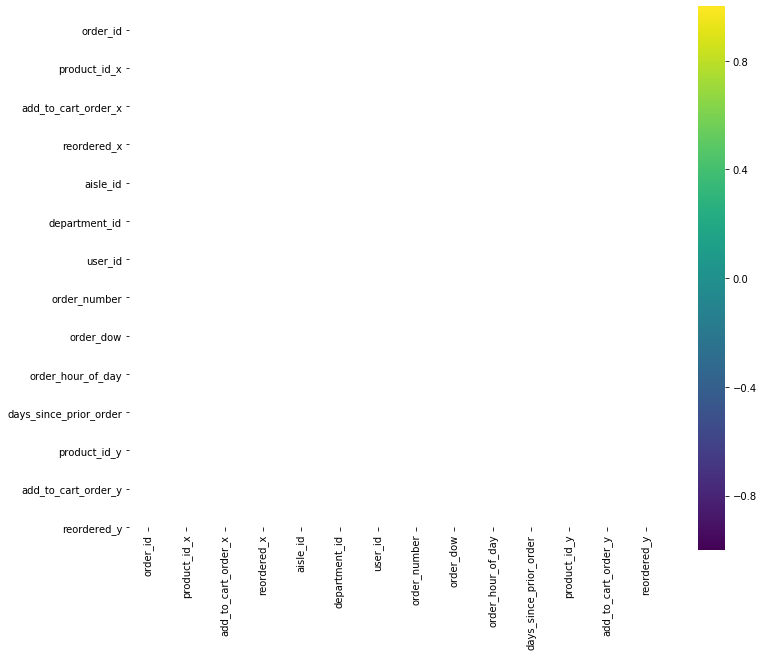

In [38]:
corr = shoppingcart.corr()


plt.figure(figsize=(12, 10))
sn.heatmap(corr[(corr >= 0.2) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);


In [39]:
shoppingcart.head()


,order_id,product_id_x,add_to_cart_order_x,reordered_x,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_y,add_to_cart_order_y,reordered_y


In [40]:
corr

,order_id,product_id_x,add_to_cart_order_x,reordered_x,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_y,add_to_cart_order_y,reordered_y
order_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
add_to_cart_order_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reordered_x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aisle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_dow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_hour_of_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# PCA

In [5]:
#aisles = pd.read_csv('aisles.csv')
#departments = pd.read_csv('departments.csv')
#orderProductsTrain = pd.read_csv('order_products__train.csv')
#orders = pd.read_csv('orders.csv')
#products = pd.read_csv('products.csv')
#orderProductsPrior = pd.read_csv('order_products__prior.csv')

order_prior = pd.merge(orderProductsPrior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
4089398,431534,196,1,1,1,prior,5,4,15,28.0
4089399,431534,12427,2,1,1,prior,5,4,15,28.0
4089400,431534,10258,3,1,1,prior,5,4,15,28.0
4089401,431534,25133,4,1,1,prior,5,4,15,28.0
4089402,431534,10326,5,0,1,prior,5,4,15,28.0


In [6]:
_mt = pd.merge(orderProductsPrior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [7]:
mt['product_name'].value_counts()[0:10]

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

In [14]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-24.215659,2.429427,-2.466369,-0.145681,0.268957,-1.432434
1,6.463208,36.751116,8.382552,15.097518,-6.920843,-0.978895
2,-7.990302,2.404383,-11.030063,0.672236,-0.442390,-2.823201
3,-27.991129,-0.755823,-1.921733,2.091884,-0.288209,0.926063
4,-19.896394,-2.637225,0.533229,3.679231,0.612814,-1.623965


(206209, 2)
          4          1
0  0.268957   2.429427
1 -6.920843  36.751116
2 -0.442390   2.404383
3 -0.288209  -0.755823
4  0.612814  -2.637225


C:\Users\acordoba\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


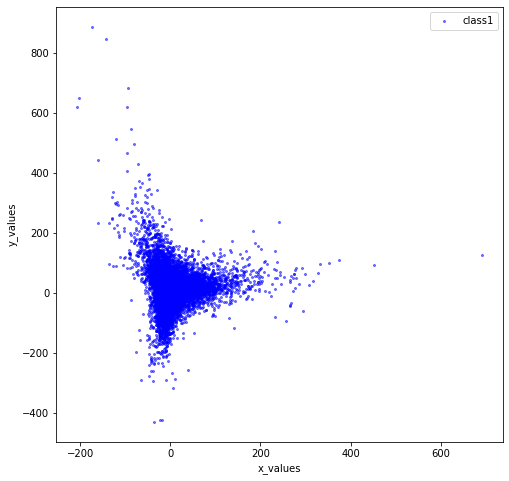

In [46]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.11868832   0.09644088]
 [-11.26759772  65.248165  ]
 [ -4.7138856  -40.63421033]
 [ 76.82338533  26.26358548]]


['orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


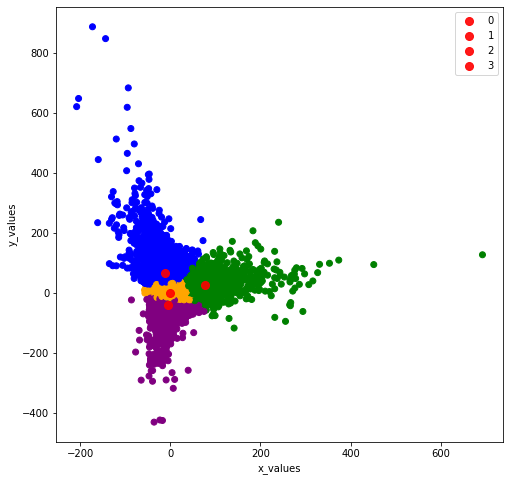

In [48]:

fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [49]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,5,0
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,2,0,19,0


(206209, 135)


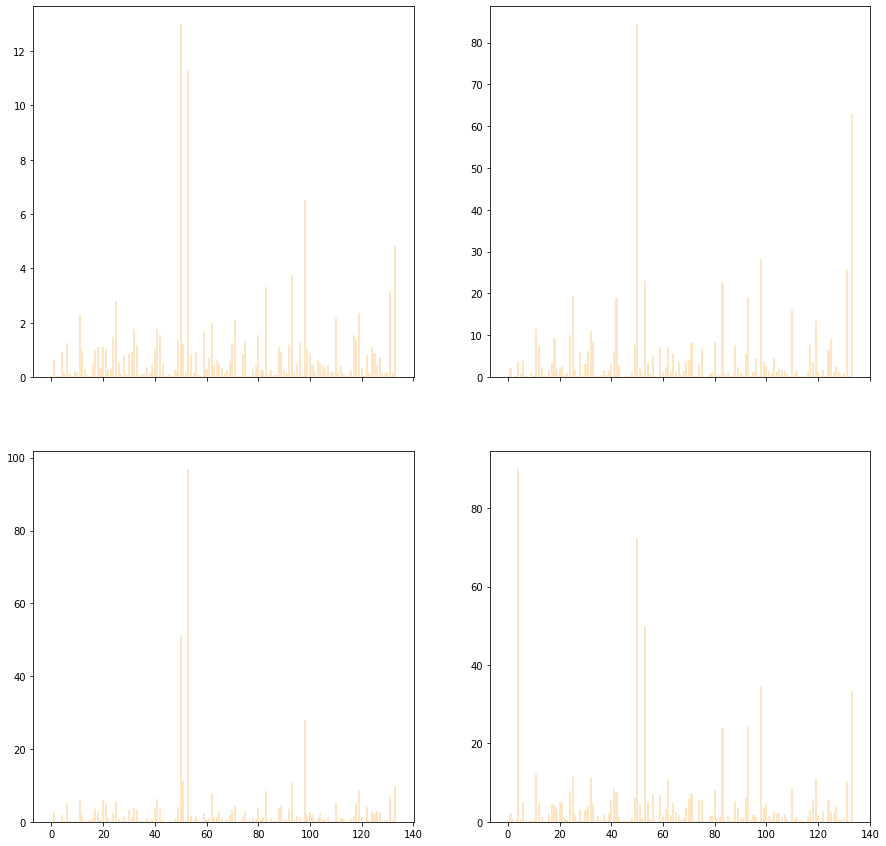

In [50]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [51]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     12.997293
fresh vegetables                 11.264617
packaged vegetables fruits        6.532016
yogurt                            4.838682
packaged cheese                   3.754675
milk                              3.303355
water seltzer sparkling water     3.168569
chips pretzels                    2.782964
soy lactosefree                   2.349505
bread                             2.279440
dtype: float64

In [52]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     84.445473
yogurt                           62.984685
packaged vegetables fruits       28.129081
water seltzer sparkling water    25.795860
fresh vegetables                 22.891787
milk                             22.726523
chips pretzels                   19.449680
packaged cheese                  19.042915
energy granola bars              19.022383
refrigerated                     16.012959
dtype: float64

In [53]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 96.941836
fresh fruits                     51.419980
packaged vegetables fruits       27.925411
fresh herbs                      11.318104
packaged cheese                  10.646082
yogurt                            9.926398
soy lactosefree                   8.805224
milk                              8.353379
frozen produce                    7.815187
water seltzer sparkling water     6.770039
dtype: float64

In [54]:
c3.sort_values(ascending=False)[0:10]

aisle
baby food formula             90.031453
fresh fruits                  72.334056
fresh vegetables              50.059111
packaged vegetables fruits    34.557484
yogurt                        33.242950
packaged cheese               24.305315
milk                          23.996746
bread                         12.200651
chips pretzels                11.457701
crackers                      11.247831
dtype: float64

In [55]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())


,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,12.997293,11.264617,6.532016,4.838682,3.754675,3.303355,3.168569,2.782964
1,84.445473,22.891787,28.129081,62.984685,19.042915,22.726523,25.795860,19.449680
2,51.419980,96.941836,27.925411,9.926398,10.646082,8.353379,6.770039,5.795979
3,72.334056,50.059111,34.557484,33.242950,24.305315,23.996746,10.527657,11.457701


In [56]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,26.720216,23.158130,13.428710,9.947504,7.718970,6.791135,6.514038,5.721298
1,29.581621,8.019094,9.853741,22.063813,6.670817,7.961201,9.036403,6.813309
2,23.611072,44.513837,12.822815,4.558012,4.888477,3.835712,3.108672,2.661403
3,27.769415,19.217949,13.266795,12.762139,9.330935,9.212474,4.041622,4.398670


In [57]:
c0.sort_values(ascending=False)[10:15]

aisle
refrigerated      2.168735
ice cream ice     2.082699
frozen produce    2.001447
eggs              1.778217
crackers          1.766064
dtype: float64

In [58]:
c1.sort_values(ascending=False)[10:15]

aisle
soy lactosefree    13.437227
bread              11.515146
crackers           10.998149
cereal              9.971054
candy chocolate     9.347526
dtype: float64

In [59]:
c2.sort_values(ascending=False)[10:15]

aisle
eggs                        6.176555
canned jarred vegetables    6.099542
bread                       6.015169
chips pretzels              5.795979
refrigerated                5.281124
dtype: float64

In [60]:
c3.sort_values(ascending=False)[10:15]

aisle
soy lactosefree                  11.003254
frozen produce                   10.577007
water seltzer sparkling water    10.527657
refrigerated                      8.530369
eggs                              8.318330
dtype: float64

In [61]:
clust_prod

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
206206,0,4,0,0,0,0,4,1,0,0,...,0,0,0,0,1,0,1,0,0,0
206207,0,0,0,0,1,0,0,0,0,0,...,4,0,2,1,0,0,11,0,15,0


In [62]:
firstMerged.head()

,product_id,count,reordered_count,first_ordered_ratio,product_name,aisle_id,department_id
0,39239,1,1.0,1.0,Singapore Street Classic Curry Noodles,66,6
1,4611,1,1.0,1.0,Fair Trade Blackberry Premium Spread,88,13
2,34443,1,1.0,1.0,Clary Sage Essential Oil,101,17
3,10665,1,1.0,1.0,3 cup Glass Tupperware with Lid,85,17
4,19740,1,1.0,1.0,Daily Moisture Quench Beauty Bar Soap,127,11


In [63]:
firstMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39123 entries, 0 to 39122
Data columns (total 7 columns):
product_id             39123 non-null int64
count                  39123 non-null int64
reordered_count        17908 non-null float64
first_ordered_ratio    17908 non-null float64
product_name           39123 non-null object
aisle_id               39123 non-null int64
department_id          39123 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 2.4+ MB


In [64]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


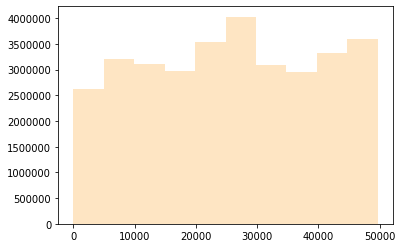

In [65]:
plt.hist(mt['product_id'])
plt.show()

In [66]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 14 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
aisle                     object
dtypes: float64(1), int64(10), object(3)
memory usage: 3.6+ GB


In [8]:
mt['order_id'] = mt['order_id'].astype('category')
mt['product_id'] = mt['product_id'].astype('category')
mt['department_id'] = mt['department_id'].astype('category')
mt['user_id'] = mt['user_id'].astype('category')
mt['order_number'] = mt['order_number'].astype('category')
mt['aisle_id'] = mt['aisle_id'].astype('category')

In [9]:
orders.head()


#features

features2 = mt.iloc[:,[0,2,3,5,6,7,9,10,11]]
features2 = features2.dropna()
print('Summary of feature sample')
features2.head()
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x=features2
x = StandardScaler().fit_transform(x)
features2.head()
x

Summary of feature sample


array([[-1.73275128, -1.03148798,  0.83413716, ..., -0.8065023 ,
         1.08188003, -1.04206244],
       [-1.73272697, -0.47021611, -1.19884361, ..., -0.86353097,
        -1.31040833,  0.60640633],
       [-1.73263176,  0.65232764, -1.19884361, ..., -0.35027295,
         1.5603377 , -1.27755798],
       ...,
       [-0.3821293 , -1.03148798, -1.19884361, ..., -0.40730162,
         0.12496468, -0.8065669 ],
       [ 0.41725129, -1.03148798,  0.83413716, ..., -0.86353097,
         0.12496468,  0.13541526],
       [ 1.47647673, -1.03148798,  0.83413716, ..., -0.57838762,
         0.12496468, -0.10008028]])

In [17]:
features2.info()
features2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 9 columns):
order_id             category
add_to_cart_order    int64
reordered            int64
aisle_id             category
department_id        category
user_id              category
order_number         category
order_dow            int64
order_hour_of_day    int64
dtypes: category(5), int64(4)
memory usage: 1.7 GB


,add_to_cart_order,reordered,order_dow,order_hour_of_day
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,8.351076e+00,5.896975e-01,2.738818e+00,1.342498e+01
std,7.126671e+00,4.918886e-01,2.090049e+00,4.246365e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01
50%,6.000000e+00,1.000000e+00,3.000000e+00,1.300000e+01
75%,1.100000e+01,1.000000e+00,5.000000e+00,1.600000e+01
max,1.450000e+02,1.000000e+00,6.000000e+00,2.300000e+01


In [39]:
#dependent variable

depVar = mt['product_id']

In [40]:
#Training Set (Feature Space: X Training)
X_train = (features2[:50000])
X_train.head()
X_train.tail()

,order_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day
49995,3073962,14,1,86,16,77466,14,4,15
49996,3074376,9,1,86,16,153050,10,2,18
49997,3074836,4,1,86,16,138470,27,3,12
49998,3074953,6,1,86,16,116549,7,6,14
49999,3075242,7,1,86,16,59145,7,4,14


In [41]:
#Dependent Variable Training Set (y Training)
y_train = depVar[:50000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 50000


0    33120
1    33120
2    33120
3    33120
4    33120
Name: product_id, dtype: category
Categories (49677, int64): [1, 2, 3, 4, ..., 49685, 49686, 49687, 49688]

In [42]:
#Testing Set (X Testing)
X_test = features2[-50000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 50000
         order_id  add_to_cart_order  reordered aisle_id department_id  \
32384489   805703                  2          1       27             5   
32384490  2388633                  4          0       27             5   
32384491  2388633                  2          0       27             5   
32384492  2388633                  3          0       27             5   
32384493    57317                  3          1       27             5   

         user_id order_number  order_dow  order_hour_of_day  
32384489  182935           26          5                 13  
32384490   62765           34          1                 16  
32384491   62765           34          1                 16  
32384492   62765           34          1                 16  
32384493   96947           25          0                  7  


In [43]:
#Ground Truth (y_test) 
y_test = depVar[-50000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 50000


32384489    46088
32384490    28578
32384491    13911
32384492    32329
32384493    48939
Name: product_id, dtype: category
Categories (49677, int64): [1, 2, 3, 4, ..., 49685, 49686, 49687, 49688]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [45]:
X_train.shape, X_test.shape

((37500, 9), (12500, 9))

In [46]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
#X_train.shape, X_test.shape

In [47]:
#Models
#modelSVR = SVR()
#modelRF = RandomForestRegressor()
#modelLR = LinearRegression()

modelSVM = SVC(gamma='scale')
modelKNN = KNeighborsClassifier()
modelCART = DecisionTreeClassifier()

In [48]:
cv=5
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
cv=3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
modelSVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
cv=5
modelCART.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:

#print(cross_val_score(modelKNN, X_train, y_train)) 
#print(cross_val_score(modelSVM, X_train, y_train)) 
#print(cross_val_score(modelCART, X_train, y_train))


In [51]:
cv=5
#Model Fitting
#modelKNN.fit(X_train,y_train)
#print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train,y_train)

0.42749333333333334

In [ ]:
#modelSVM.fit(X_train,y_train)
#print(cross_val_score(modelSVM, X_train, y_train)) 
modelSVM.score(X_train,y_train)

In [53]:

#modelCART.fit(X_train,y_train)
#print(cross_val_score(modelCART, X_train, y_train)) 
modelCART.score(X_train,y_train)

1.0

In [54]:

# Predictions
predictions = modelCART.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)


R Squared: -0.816
RMSE: 13950.214


In [55]:
predictions = modelKNN.predict(X_test)
y_test

print(accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
#print(classification_report(y_test, predictions))

0.24312


In [56]:
predictions = modelCART.predict(X_test)
y_test

print(accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
#print(classification_report(y_test, predictions))

0.23032


In [57]:
predictions = modelKNN.predict(X_test)
y_test

print(accuracy_score(y_test, predictions))


0.24312


In [27]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 0  1  0 ...  0  0  0]
 [ 0 14  1 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 ...
 [ 0  1  2 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

        1541       0.00      0.00      0.00        14
        1890       0.02      0.05      0.03       264
        2108       0.00      0.00      0.00        51
        2174       0.00      0.00      0.00         1
        2210       0.01      0.02      0.01       256
        3784       0.00      0.00      0.00         0
        4234       0.00      0.00      0.00         1
        5038       0.00      0.00      0.00         1
        5115       0.00      0.02      0.01       198
        5262       0.00      0.00      0.00       100
        5535       0.01      0.03      0.02        35
        5545       0.00      0.00      0.00        29
        5634       0.00      0.00      0.00        13
        5782       0.01      0.02      0.01       143
        6341       0.01      0.03

C:\Users\acordoba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\acordoba\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
y_test

7830     33120
52680    18465
63731    36550
29535    11520
47073    32655
         ...  
50482     6774
85448    28851
25298    30385
41788    49324
86713    17902
Name: product_id, Length: 25000, dtype: category
Categories (49677, int64): [1, 2, 3, 4, ..., 49685, 49686, 49687, 49688]

In [ ]:
predictions

In [ ]:
X_test